In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import itertools
import os

Nombre d'images récupéré avec l'aide du Google Chrome Image Downloader

In [38]:
# Chemin du dossier à inspecter
folder_path_jfif = "emotions\disgust\jfif"

# Récupére la liste des éléments dans le dossier
file_list_jfif = os.listdir(folder_path_jfif)

# Compte le nombre d'éléments (fichiers) dans le dossier
file_count_jfif = len([f for f in file_list_jfif if os.path.isfile(os.path.join(folder_path_jfif, f))])

# Chemin du dossier à inspecter
folder_path_jpg = "emotions\disgust\jpg"

# Récupére la liste des éléments dans le dossier
file_list_jpg= os.listdir(folder_path_jpg)

# Compte le nombre d'éléments (fichiers) dans le dossier
file_count_jpg = len([f for f in file_list_jpg if os.path.isfile(os.path.join(folder_path_jpg, f))])

file_count = file_count_jfif + file_count_jpg

print("Le nombre de fichiers dans le dossier est:", file_count)

Le nombre de fichiers dans le dossier est: 684


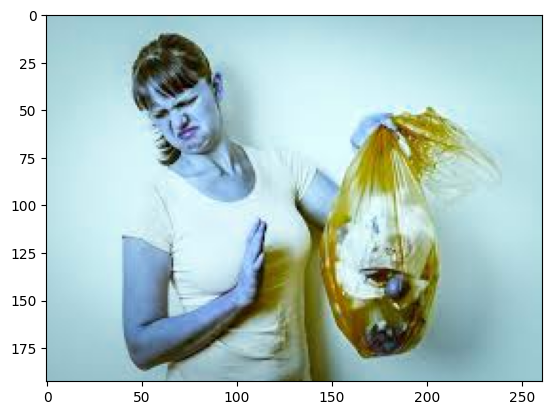

In [19]:
image = cv2.imread("emotions/disgust/jfif/img (2).jfif")
plt.imshow(image, cmap='gray')

Extraction des visages à partir des images présent dans deux formats différents

In [39]:
extensions = ['jfif', 'jpg']
j = 1  
for ext in extensions: 
    print(ext)     
    for i in range(file_count):
        # Charge l'image        
        image = cv2.imread(f"""emotions/disgust/{ext}/img ({i}).{ext}""")

        # Charge le classifieur Haar cascade
        face_cascade = cv2.CascadeClassifier("haarcascade_frontalface_default.xml")

        # Détecte les visages dans l'image
        faces = face_cascade.detectMultiScale(image, 1.3, 5)
        
        # Pour chaque visage détecté
        for (x, y, w, h) in faces:
            # Recadre l'image pour ne conserver que le visage
            face_cropped = image[y:y+h, x:x+w]
            
            # Redimensionne l'image
            face_resized = cv2.resize(face_cropped, (48, 48))
            
            # Converti l'image en niveaux de gris
            face_gray = cv2.cvtColor(face_resized, cv2.COLOR_BGR2GRAY)
                    
            # Enregistre l'image
            cv2.imwrite(f"""emotions_face/disgust/disgust-{j}.jpg""", face_gray)
            print(j)
            j += 1


jfif
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276

In [40]:
# Chemin du dossier à inspecter
folder_path_bis = "emotions_face\disgust"

# Récupére la liste des éléments dans le dossier
file_list_bis = os.listdir(folder_path_bis)

# Compte le nombre d'éléments (fichiers) dans le dossier
file_count_bis = len([f for f in file_list_bis if os.path.isfile(os.path.join(folder_path_bis, f))])

print("Le nombre de fichiers dans le dossier est:", file_count_bis)

Le nombre de fichiers dans le dossier est: 496


505 visages sont extraits, soit 73% des images récupérées en sachant que certaines présentées un visage partielle !

(48, 48, 3)
(48, 48, 1)


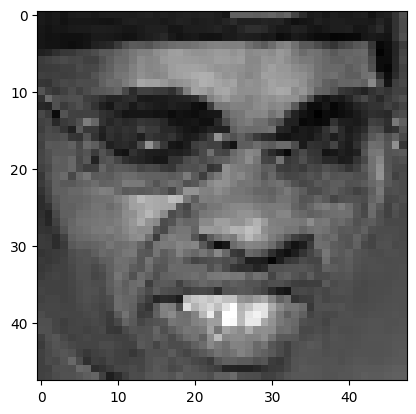

In [41]:
image2 = cv2.imread("emotions_face\disgust\disgust-1.jpg")
print(image2.shape)
gray_image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)
image2_r = gray_image2.reshape(48, 48, 1)
print(image2_r.shape)
plt.imshow(image2_r, cmap='gray')

Création du dataframe qui intègrera les images sous forme de string, l'émotion associé et son usage pour correspondre au format du dataframe fer2013

In [42]:
df = pd.DataFrame([], columns = ['emotion', 'pixels', 'Usage'])
df.head()

,emotion,pixels,Usage


Intégration des visages dans le dataframe après transformation du tableau en chaine

In [43]:
for i in range(1, file_count_bis + 1):
    # Charger l'image
    image = cv2.imread(f"""emotions_face/disgust/disgust-{i}.jpg""")
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    #image_reshape1 = gray_image.reshape(42,42,1)
    image_reshape2 = gray_image.reshape(-1)
    print(image_reshape2.shape)
    image_itertool = itertools.chain(image_reshape2)
    image_join =' '.join(map(str, list(image_itertool)))
    df.loc[len(df)] = [1, image_join, 'Training']   


(2304,)
(2304,)
(2304,)
(2304,)
(2304,)
(2304,)
(2304,)
(2304,)
(2304,)
(2304,)
(2304,)
(2304,)
(2304,)
(2304,)
(2304,)
(2304,)
(2304,)
(2304,)
(2304,)
(2304,)
(2304,)
(2304,)
(2304,)
(2304,)
(2304,)
(2304,)
(2304,)
(2304,)
(2304,)
(2304,)
(2304,)
(2304,)
(2304,)
(2304,)
(2304,)
(2304,)
(2304,)
(2304,)
(2304,)
(2304,)
(2304,)
(2304,)
(2304,)
(2304,)
(2304,)
(2304,)
(2304,)
(2304,)
(2304,)
(2304,)
(2304,)
(2304,)
(2304,)
(2304,)
(2304,)
(2304,)
(2304,)
(2304,)
(2304,)
(2304,)
(2304,)
(2304,)
(2304,)
(2304,)
(2304,)
(2304,)
(2304,)
(2304,)
(2304,)
(2304,)
(2304,)
(2304,)
(2304,)
(2304,)
(2304,)
(2304,)
(2304,)
(2304,)
(2304,)
(2304,)
(2304,)
(2304,)
(2304,)
(2304,)
(2304,)
(2304,)
(2304,)
(2304,)
(2304,)
(2304,)
(2304,)
(2304,)
(2304,)
(2304,)
(2304,)
(2304,)
(2304,)
(2304,)
(2304,)
(2304,)
(2304,)
(2304,)
(2304,)
(2304,)
(2304,)
(2304,)
(2304,)
(2304,)
(2304,)
(2304,)
(2304,)
(2304,)
(2304,)
(2304,)
(2304,)
(2304,)
(2304,)
(2304,)
(2304,)
(2304,)
(2304,)
(2304,)
(2304,)
(2304,)
(2304,)


In [46]:
df

,emotion,pixels,Usage
0,1,54 51 54 50 55 56 56 53 56 57 57 57 56 59 60 5...,Training
1,1,215 196 133 61 50 47 58 62 61 60 58 59 63 70 7...,Training
2,1,189 187 187 188 189 189 190 180 134 126 118 11...,Training
3,1,49 55 46 41 55 53 42 57 74 75 68 84 83 82 73 8...,Training
4,1,63 47 34 29 29 32 34 32 29 33 36 30 21 30 49 7...,Training
...,...,...,...
491,1,127 135 156 145 166 137 154 179 118 145 139 15...,Training
492,1,108 80 58 63 81 109 82 58 79 72 93 75 85 110 1...,Training
493,1,183 181 180 183 194 203 204 206 208 205 196 18...,Training
494,1,199 193 184 207 172 152 198 191 162 166 206 14...,Training


Vérification que l'opération inverse se passe comme prévu.

In [45]:
X_train = df.pixels
X_train

0      54 51 54 50 55 56 56 53 56 57 57 57 56 59 60 5...
1      215 196 133 61 50 47 58 62 61 60 58 59 63 70 7...
2      189 187 187 188 189 189 190 180 134 126 118 11...
3      49 55 46 41 55 53 42 57 74 75 68 84 83 82 73 8...
4      63 47 34 29 29 32 34 32 29 33 36 30 21 30 49 7...
                             ...                        
491    127 135 156 145 166 137 154 179 118 145 139 15...
492    108 80 58 63 81 109 82 58 79 72 93 75 85 110 1...
493    183 181 180 183 194 203 204 206 208 205 196 18...
494    199 193 184 207 172 152 198 191 162 166 206 14...
495    83 66 60 99 107 117 128 140 134 134 136 140 14...
Name: pixels, Length: 496, dtype: object

In [28]:
X_train_list = np.array(list(map(str.split, X_train)), np.float32)
X_train_list

array([[ 54.,  51.,  54., ..., 103., 104., 104.],
       [215., 196., 133., ..., 226., 232., 229.],
       [189., 187., 187., ...,  59.,  60.,  80.],
       ...,
       [183., 181., 180., ..., 199., 203., 204.],
       [199., 193., 184., ..., 250., 250., 250.],
       [ 83.,  66.,  60., ..., 254., 254., 255.]], dtype=float32)

In [29]:
X_train_list.shape

(496, 2304)

In [31]:
X_train_reshape = X_train_list.reshape(X_train_list.shape[0], 48, 48, 1) 
X_train_reshape.shape

(496, 48, 48, 1)

In [32]:
X_train_reshape[0].shape

(48, 48, 1)

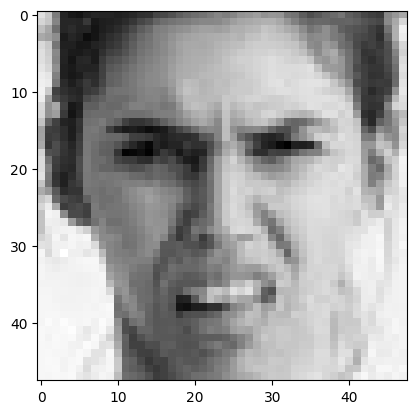

In [33]:
plt.imshow(X_train_reshape[1], cmap='gray')

Conversion du dataframe en format csv pour être intégré à fer2013.

In [48]:
df.to_csv('disgust.csv', index=False, encoding='utf-8')

In [34]:
fer = pd.read_csv('fer2013.csv')
fer.head()

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


In [36]:
X = np.array(list(map(str.split, fer['pixels'])), np.float32)

In [37]:
X.shape

(35887, 2304)

In [47]:
disgust = pd.read_csv('disgust.csv')
disgust.head()

,pixels,emotion,Usage
0,54 51 54 50 55 56 56 53 56 57 57 57 56 59 60 5...,1,Training
1,215 196 133 61 50 47 58 62 61 60 58 59 63 70 7...,1,Training
2,189 187 187 188 189 189 190 180 134 126 118 11...,1,Training
3,49 55 46 41 55 53 42 57 74 75 68 84 83 82 73 8...,1,Training
4,63 47 34 29 29 32 34 32 29 33 36 30 21 30 49 7...,1,Training
